<a href="https://colab.research.google.com/github/rajpalsumit25/Difference-Network/blob/main/Parking_Data_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Model,load_model
from keras.optimizers import RMSprop
from keras.layers import Lambda,Dense, Conv2D, MaxPooling2D,Activation, Flatten, Conv2DTranspose, Reshape,Input, Dropout , Permute,Add,concatenate,Dropout,Subtract
#keras.backend.set_image_data_format('channels_last')
from keras.callbacks import ModelCheckpoint
from tensorflow.python.client import device_lib
import tensorflow as tf
from sklearn.model_selection import KFold
import keras.backend as K
from keras.callbacks import Callback,LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
import skimage.transform
import skimage.io
from keras.preprocessing import image
import matplotlib.pyplot as plt
import skimage
from keras.preprocessing.image import ImageDataGenerator
import cv2,os

In [ ]:
#def FCN8( nClasses ,  input_height=224, input_width=224):
input_height = 224
input_width = 224
nClasses =2

assert input_height%32 == 0
assert input_width%32 == 0
IMAGE_ORDERING =  "channels_last" 

img_inputa= Input(shape=(input_height,input_width, 3)) 
img_inputb= Input(shape=(input_height,input_width, 3))

## Block 1
xa = Conv2D(64, (3, 3), activation='relu', padding='same', name='blocka1_conv1', data_format=IMAGE_ORDERING )(img_inputa)
#xa = Conv2D(64, (3, 3), activation='relu', padding='same', name='blocka1_conv2', data_format=IMAGE_ORDERING )(xa)
xa = MaxPooling2D((2, 2), strides=(2, 2), name='blocka1_pool', data_format=IMAGE_ORDERING )(xa)
fa1 = xa

# Block 2
xa = Conv2D(128, (3, 3), activation='relu', padding='same', name='blocka2_conv1', data_format=IMAGE_ORDERING )(xa)
#xa = Conv2D(128, (3, 3), activation='relu', padding='same', name='blocka2_conv2', data_format=IMAGE_ORDERING )(xa)
xa = MaxPooling2D((2, 2), strides=(2, 2), name='blocka2_pool', data_format=IMAGE_ORDERING )(xa)
fa2 = xa

# Block 3
xa = Conv2D(256, (3, 3), activation='relu', padding='same', name='blocka3_conv1', data_format=IMAGE_ORDERING )(xa)
#xa = Conv2D(256, (3, 3), activation='relu', padding='same', name='blocka3_conv2', data_format=IMAGE_ORDERING )(xa)
#xa = Conv2D(256, (3, 3), activation='relu', padding='same', name='blocka3_conv3', data_format=IMAGE_ORDERING )(xa)
xa = MaxPooling2D((2, 2), strides=(2, 2), name='blocka3_pool', data_format=IMAGE_ORDERING )(xa)
poola3 = xa

# Block 4
xa = Conv2D(512, (3, 3), activation='relu', padding='same', name='blocka4_conv1', data_format=IMAGE_ORDERING )(xa)
#xa = Conv2D(512, (3, 3), activation='relu', padding='same', name='blocka4_conv2', data_format=IMAGE_ORDERING )(xa)
#xa = Conv2D(512, (3, 3), activation='relu', padding='same', name='blocka4_conv3', data_format=IMAGE_ORDERING )(xa)
poola4 = MaxPooling2D((2, 2), strides=(2, 2), name='blocka4_pool', data_format=IMAGE_ORDERING )(xa)## (None, 14, 14, 512) 

# Block 5
xa = Conv2D(512, (3, 3), activation='relu', padding='same', name='blocka5_conv1', data_format=IMAGE_ORDERING )(poola4)
#xa = Conv2D(512, (3, 3), activation='relu', padding='same', name='blocka5_conv2', data_format=IMAGE_ORDERING )(xa)
#xa = Conv2D(512, (3, 3), activation='relu', padding='same', name='blocka5_conv3', data_format=IMAGE_ORDERING )(xa)
poola5 = MaxPooling2D((2, 2), strides=(2, 2), name='blocka5_pool', data_format=IMAGE_ORDERING )(xa)## (None, 7, 7, 512)

#Reconstruction from 7 x 7 Image
img1ra = (Conv2DTranspose(8,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img1r_transpose1',data_format=IMAGE_ORDERING))(poola5)
img1rb = (Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img1r_transpose2',data_format=IMAGE_ORDERING))(img1ra)
img1rc = (Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img1r_transpose3',data_format=IMAGE_ORDERING))(img1rb)
img1rd = (Conv2DTranspose(64,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img1r_transpose4',data_format=IMAGE_ORDERING))(img1rc)
img1re = (Conv2DTranspose(3,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img1r_transpose5',data_format=IMAGE_ORDERING))(img1rd)
img1rf = (Activation('softmax',name = 'img1r_activation'))(img1re)




    
  ####################################################################
#     y_p = Lambda(lambda xx:K.argmax(xx,axis=3),name='arg')(o)
#     lm=Lambda(get_seg_colorTensor,output_shape=(224,224,3),name='outputmap')(y_p)
#     print(lm.shape)
#################################################################################

## Block 1
xb = Conv2D(64, (3, 3), activation='relu', padding='same', name='blockb1_conv1', data_format=IMAGE_ORDERING )(img_inputb)
#xb = Conv2D(64, (3, 3), activation='relu', padding='same', name='blockb1_conv2', data_format=IMAGE_ORDERING )(xb)
xb = MaxPooling2D((2, 2), strides=(2, 2), name='blockb1_pool', data_format=IMAGE_ORDERING )(xb)
fb1 = xb

# Block 2
xb = Conv2D(128, (3, 3), activation='relu', padding='same', name='blockb2_conv1', data_format=IMAGE_ORDERING )(xb)
#xb = Conv2D(128, (3, 3), activation='relu', padding='same', name='blockb2_conv2', data_format=IMAGE_ORDERING )(xb)
xb = MaxPooling2D((2, 2), strides=(2, 2), name='blockb2_pool', data_format=IMAGE_ORDERING )(xb)
fb2 = xb

# Block 3
xb = Conv2D(256, (3, 3), activation='relu', padding='same', name='blockb3_conv1', data_format=IMAGE_ORDERING )(xb)
#xb = Conv2D(256, (3, 3), activation='relu', padding='same', name='blockb3_conv2', data_format=IMAGE_ORDERING )(xb)
#xb = Conv2D(256, (3, 3), activation='relu', padding='same', name='blockb3_conv3', data_format=IMAGE_ORDERING )(xb)
xb = MaxPooling2D((2, 2), strides=(2, 2), name='blockb3_pool', data_format=IMAGE_ORDERING )(xb)
poolb3 = xb

# Block 4
xb = Conv2D(512, (3, 3), activation='relu', padding='same', name='blockb4_conv1', data_format=IMAGE_ORDERING )(xb)
#xb = Conv2D(512, (3, 3), activation='relu', padding='same', name='blockb4_conv2', data_format=IMAGE_ORDERING )(xb)
#xb = Conv2D(512, (3, 3), activation='relu', padding='same', name='blockb4_conv3', data_format=IMAGE_ORDERING )(xb)
poolb4 = MaxPooling2D((2, 2), strides=(2, 2), name='blockb4_pool', data_format=IMAGE_ORDERING )(xb)## (None, 14, 14, 512) 

# Block 5
xb = Conv2D(512, (3, 3), activation='relu', padding='same', name='blockb5_conv1', data_format=IMAGE_ORDERING )(poolb4)
#xb = Conv2D(512, (3, 3), activation='relu', padding='same', name='blockb5_conv2', data_format=IMAGE_ORDERING )(xb)
#xb = Conv2D(512, (3, 3), activation='relu', padding='same', name='blockb5_conv3', data_format=IMAGE_ORDERING )(xb)
poolb5 = MaxPooling2D((2, 2), strides=(2, 2), name='blockb5_pool', data_format=IMAGE_ORDERING )(xb)## (None, 7, 7, 512)

img2ra = (Conv2DTranspose(8,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img2r_transpose1',data_format=IMAGE_ORDERING))(poolb5)
img2rb = (Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img2r_transpose2',data_format=IMAGE_ORDERING))(img2ra)
img2rc = (Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img2r_transpose3',data_format=IMAGE_ORDERING))(img2rb)
img2rd = (Conv2DTranspose(64,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img2r_transpose4',data_format=IMAGE_ORDERING))(img2rc)
img2re = (Conv2DTranspose(3,kernel_size=(2,2),strides=(2,2),use_bias=False,name='img2r_transpose5',data_format=IMAGE_ORDERING))(img2rd)
img2rf = (Activation('softmax',name='img2r_activation'))(img2re)


#global img1r_model,img2r_model
img1r_model = Model(img_inputa,img1rf)
img2r_model = Model(img_inputb,img2rf)

vgga  = Model(  img_inputa,poola5  )
vggb = Model(img_inputb,poolb5)

vgga.load_weights('/content/drive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',by_name=True)
vggb.load_weights('/content/drive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',by_name=True)
model_input1=vgga.output
model_input2=vggb.output
model_concat=concatenate([model_input1,model_input2])

pool3_concat=concatenate([poola3,poolb3])
pool4_concat=concatenate([poola4,poolb4])
#modelx=Model(inputs=[img_inputa,img_inputb],outputs=[model_concat])

n = 512

o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(model_concat)
o = Dropout(0.5)(o)
conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
conv7 = Dropout(0.5)(conv7)
conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)

pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4_concat)
pool411 = Dropout(0.5)(pool411)
pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)

pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3_concat)
pool311 = Dropout(0.5)(pool311)    
o = Add(name="add")([pool411_2, pool311, conv7_4 ])
o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
o = (Activation('softmax',name='segmap'))(o)




model = Model([img_inputa,img_inputb], [o,img1rf,img2rf])
#model = Model(img_inputa,img1re )

    #return model
#model = FCN8(nClasses     = 2,  
             #input_height = 192, 
             #input_width  = 192)
print(model.summary())

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
blocka1_conv1 (Conv2D)          (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
blockb1_conv1 (Conv2D)          (None, 224, 224, 64) 1792        input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
'''train_images_randomized=[]
train_images_distorted=[]
train_images_masks=[]


for i in range(0,2300):
  #if i>0:
        print(i)
        img1 = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org1_gray/'+str(i)+'_gray.png',0)
        img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
        #img1=cv2.resize(img1,(192,192))
        img2=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org2_gray/'+str(i)+'_2_gray.png',0)
        img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
        #img2 = datagen.random_transform(img2,seed=i)
        #img2=cv2.resize(img2,(192,192))
        #img2 = datagen.random_transform(img2,seed=1)
        #img2=skimage.transform.resize(img2,(192,192))
        pic=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/mask_inv/'+str(i)+'_mask_inv.jpg',0)
        #pic=skimage.transform.resize(pic,(192,192))
        #img1=image.img_to_array(img1)
        img1=img1/255
        #img2=image.img_to_array(img2)
        img2=img2/255
        #pic=cv2.resize(pic,(192,192))
        pic=image.img_to_array(pic)
        #pic = np.squeeze(pic , axis = 2)
        #pic=preprocess_input(pic)
        pic=pic/255
        train_images_distorted.append(img1)
        train_images_randomized.append(img2)
        label = np.zeros(shape = (224,224,2))
        label[:,:,0]=(pic[:,:,0]==0).astype(int)
        label[:,:,1]=(pic[:,:,0]==1).astype(int)
        #label=datagen.random_transform(label,seed=i)
        #train_images_masks.append(pic)
        train_images_masks.append(label)

print('COMPLETED')
print(len(train_images_distorted))'''

"train_images_randomized=[]\ntrain_images_distorted=[]\ntrain_images_masks=[]\n\n\nfor i in range(0,2300):\n  #if i>0:\n        print(i)\n        img1 = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org1_gray/'+str(i)+'_gray.png',0)\n        img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)\n        #img1=cv2.resize(img1,(192,192))\n        img2=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org2_gray/'+str(i)+'_2_gray.png',0)\n        img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)\n        #img2 = datagen.random_transform(img2,seed=i)\n        #img2=cv2.resize(img2,(192,192))\n        #img2 = datagen.random_transform(img2,seed=1)\n        #img2=skimage.transform.resize(img2,(192,192))\n        pic=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/mask_inv/'+str(i)+'_mask_inv.jpg',0)\n        #pic=skimage.transform.resize(pic,(192,192))\n        #img1=image.img_to_array(img1)\n        img1=img1/255\n        #img2=image.img_to_array(img2)\n        img2=img2/255\n  

In [ ]:
datagen = ImageDataGenerator( width_shift_range = 0.03, height_shift_range = 0.03, rotation_range = 1, zoom_range = 0.03,fill_mode='nearest')
#mask_datagen = ImageDataGenerator(rescale = 1/255, width_shift_range=0.2, height_shift_range = 0.2,rotation_range=40)
#seed = 1
#datagen.fit(train_images_randomized,augment = True, seed = seed)
#datagen.fit(train_images_distorted,augment = True, seed = seed)

In [ ]:
path = '/content/drive/My Drive/Diff_Net_Parking_Data/Masks_Erode_Dilate_Thresh4/'
train_images_randomized=[]
train_images_distorted=[]
train_images_masks=[]

for i in range(0,15000,5):
  #if i>0:
        #print(i)
        try:
          pic=cv2.imread(path+str(i)+'_mask_thresh.jpg.png',0)
          pic=image.img_to_array(pic)
          img1 = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org1_gray/'+str(i)+'_gray.png',0)
          img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
          #img1=cv2.resize(img1,(192,192))
          img2=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org2_gray/'+str(i)+'_2_gray.png',0)
          img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
          img2 = datagen.random_transform(img2,seed=i)
          #img2=skimage.transform.resize(img2,(192,192))
          #pic=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/mask_inv/'+str(i)+'_mask_inv.jpg',0)
          #pic=skimage.transform.resize(pic,(192,192))
          #img1=image.img_to_array(img1)
          img1=img1/255
          #img2=image.img_to_array(img2)
          img2=img2/255
          #pic=cv2.resize(pic,(192,192))
          #pic = np.squeeze(pic , axis = 2)
          #pic=preprocess_input(pic)
          pic=pic/255
          train_images_distorted.append(img1)
          train_images_randomized.append(img2)
          label = np.zeros(shape = (224,224,2))
          label[:,:,0]=(pic[:,:,0]==0).astype(int)
          label[:,:,1]=(pic[:,:,0]==1).astype(int)
          #label=datagen.random_transform(label,seed=i)
          #train_images_masks.append(pic)
          train_images_masks.append(label)
          print(i)
        except:
          #print('EXCEPT:',i)
          pass

print('COMPLETED')
print(len(train_images_distorted))

0
5
10
25
30
50
55
60
75
95
100
105
125
130
170
195
205
210
215
230
235
240
245
270
275
285
295
310
315
360
365
370
375
410
425
430
450
455
465
490
500
515
520
525
535
550
555
580
590
595
605
610
635
640
660
665
670
680
695
700
705
715
720
730
735
740
750
755
780
800
810
825
835
845
850
855
880
885
900
910
915
920
925
930
935
945
955
970
980
985
1030
1035
1040
1050
1095
1100
1110
1120
1135
1150
1180
1205
1210
1240
1245
1250
1260
1265
1275
1290
1310
1315
1355
1365
1380
1390
1395
1410
1420
1430
1440
1445
1460
1465
1470
1475
1510
1515
1525
1530
1550
1565
1575
1580
1590
1595
1605
1610
1640
1645
1650
1665
1690
1705
1720
1725
1735
1760
1770
1785
1795
1815
1820
1825
1840
1855
1860
1865
1870
1895
1905
1920
1925
1935
1950
1955
1970
1985
1990
1995
2015
2025
2045
2055
2070
2085
2095
2100
2105
2120
2130
2135
2140
2145
2150
2175
2180
2215
2230
2240
2270
2295
2305
2310
2320
2330
2340
2350
2355
2370
2375
2390
2395
2400
2420
2435
2455
2470
2475
2500
2520
2525
2550
2555
2560
2565
2570
2575
2580
2585
25

In [ ]:


for i in range(1,15000,5):
  #if i>0:
        #print(i)
        try:
          pic=cv2.imread(path+str(i)+'_mask_thresh.jpg.png',0)
          pic=image.img_to_array(pic)
          print(i)
          img1 = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org1_gray/'+str(i)+'_gray.png',0)
          img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
          #img1=cv2.resize(img1,(192,192))
          img2=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org2_gray/'+str(i)+'_2_gray.png',0)
          img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
          img2 = datagen.random_transform(img2,seed=i)
          #img2=cv2.resize(img2,(192,192))
          #img2 = datagen.random_transform(img2,seed=1)
          #img2=skimage.transform.resize(img2,(192,192))
          #pic=cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/mask_inv/'+str(i)+'_mask_inv.jpg',0)
          #pic=skimage.transform.resize(pic,(192,192))
          #img1=image.img_to_array(img1)
          img1=img1/255
          #img2=image.img_to_array(img2)
          img2=img2/255
          #pic=cv2.resize(pic,(192,192))
          #pic = np.squeeze(pic , axis = 2)
          #pic=preprocess_input(pic)
          pic=pic/255
          train_images_distorted.append(img2)
          train_images_randomized.append(img1)
          label = np.zeros(shape = (224,224,2))
          label[:,:,0]=(pic[:,:,0]==0).astype(int)
          label[:,:,1]=(pic[:,:,0]==1).astype(int)
          #label=datagen.random_transform(label,seed=i)
          #train_images_masks.append(pic)
          train_images_masks.append(label)
        except:
          print('EXCEPT:',i)
          #pass

print('COMPLETED')
print(len(train_images_distorted))

EXCEPT: 1
EXCEPT: 6
EXCEPT: 11
16
EXCEPT: 21
26
31
EXCEPT: 36
EXCEPT: 41
46
51
EXCEPT: 56
61
66
EXCEPT: 71
EXCEPT: 76
81
86
EXCEPT: 91
EXCEPT: 96
101
EXCEPT: 106
111
EXCEPT: 116
EXCEPT: 121
EXCEPT: 126
131
136
141
EXCEPT: 146
151
EXCEPT: 156
161
166
171
EXCEPT: 176
EXCEPT: 181
EXCEPT: 186
191
196
201
EXCEPT: 206
EXCEPT: 211
216
EXCEPT: 221
226
EXCEPT: 231
EXCEPT: 236
241
246
EXCEPT: 251
EXCEPT: 256
EXCEPT: 261
EXCEPT: 266
271
EXCEPT: 276
281
286
EXCEPT: 291
296
301
306
311
316
EXCEPT: 321
326
331
EXCEPT: 336
EXCEPT: 341
EXCEPT: 346
351
EXCEPT: 356
361
EXCEPT: 366
EXCEPT: 371
EXCEPT: 376
EXCEPT: 381
EXCEPT: 386
391
396
EXCEPT: 401
EXCEPT: 406
EXCEPT: 411
EXCEPT: 416
421
EXCEPT: 426
EXCEPT: 431
436
EXCEPT: 441
EXCEPT: 446
EXCEPT: 451
456
461
466
EXCEPT: 471
476
EXCEPT: 481
EXCEPT: 486
EXCEPT: 491
EXCEPT: 496
EXCEPT: 501
506
EXCEPT: 511
516
521
EXCEPT: 526
EXCEPT: 531
EXCEPT: 536
541
546
551
EXCEPT: 556
EXCEPT: 561
566
571
576
581
586
EXCEPT: 591
596
601
EXCEPT: 606
EXCEPT: 611
616
EXCEPT

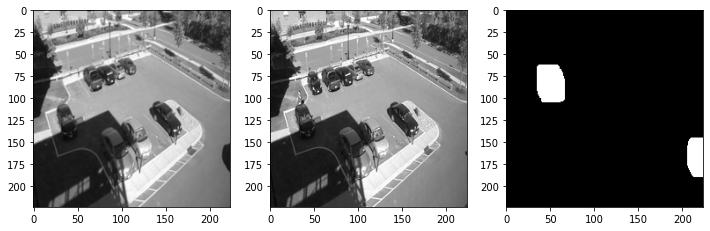

In [ ]:
fig = plt.figure(figsize=(12,12))
img1 = fig.add_subplot(1,3,1)
plt.imshow(train_images_distorted[-2],cmap='gray')
img2 = fig.add_subplot(1,3,2)
plt.imshow(train_images_randomized[-2],cmap='gray')
img3 = fig.add_subplot(1,3,3)
plt.imshow(train_images_masks[-2][:,:,1],cmap='gray')

In [ ]:
print(train_images_distorted[0].shape,train_images_distorted[0].max(),train_images_distorted[0].min())
print(train_images_randomized[0].shape,train_images_randomized[0].max(),train_images_randomized[0].min())
print(train_images_masks[0].shape,train_images_masks[0].max(),train_images_masks[0].min())

(224, 224, 3) 1.0 0.00784313725490196
(224, 224, 3) 0.996078431372549 0.023529411764705882
(224, 224, 2) 1.0 0.0


In [ ]:
train_images_distorted = np.array(train_images_distorted)
train_images_randomized = np.array(train_images_randomized)
train_images_masks = np.array(train_images_masks)

In [ ]:
#losses = {}
#img1r_model.compile(loss = 'MSE',optimizer = 'adam' , metrics = ['accuracy'])
#img2r_model.compile(loss = 'MSE',optimizer = 'adam' , metrics = ['accuracy'])
model.compile(loss = {'segmap':'binary_crossentropy',
                      'img1r_activation':'mse',
                      'img2r_activation':'mse'}, optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
check2 = ModelCheckpoint('Parking_Datagen_THRESH_3k_MSE2.h5',save_weights_only = True,period = 10)

In [ ]:
history = model.fit([train_images_randomized,train_images_distorted],{'segmap':train_images_masks,'img1r_activation':train_images_distorted,'img2r_activation':train_images_randomized},validation_split=0.1,epochs=50,shuffle=True,batch_size=32,callbacks=[check2])

model.save_weights('/content/drive/My Drive/Diff_Net_Parking_Data/MODELS/Parking_Datagen_THRESH_3k_MSE2_epochs50.h5')

In [ ]:
model.load_weights('/content/drive/My Drive/Diff_Net_Parking_Data/MODELS/Parking_Datagen_THRESH_3k_MSE2_epochs50.h5')

(224, 224, 3)
255 2
255 4


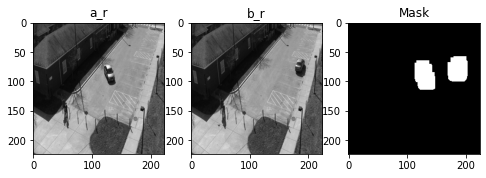

In [ ]:
#TEST REPLACED PARTS
#DIFFERENT
a_r = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org1_gray/5_gray.png')
#a=cv2.cvtColor(a,cv2.COLOR_BGRA2BGR)
#a2=cv2.resize(a,(192,192))
#a2 = skimage.transform.rotate(a2,10)
#plt.imshow(a2)
#a_r=image.img_to_array(a2)
#a_r = a_r/255
#a_r=preprocess_input(a_r)
print(a_r.shape)
print(a_r.max(),a_r.min())


#ar=a_r/255
b_r = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/org2_gray/5_2_gray.png')
#b=cv2.cvtColor(b,cv2.COLOR_BGRA2BGR)
#b2=cv2.resize(b,(192,192))
#b_r=image.img_to_array(b2)
#b_r=preprocess_input(b_r)
#b_r = b_r/255
print(b_r.max(),b_r.min())
#plt.imshow(b2)
fig = plt.figure(figsize = (8,8))
img1 = fig.add_subplot(1,3,1)
img1.set_title('a_r')
plt.imshow(a_r,cmap='gray')

img2 = fig.add_subplot(1,3,2)
img2.set_title('b_r')
plt.imshow(b_r,cmap='gray')

mask = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/Masks_Erode_Dilate_Thresh4/5_mask_thresh.jpg.png')
img3 = fig.add_subplot(1,3,3)
img3.set_title('Mask')
plt.imshow(mask)

#br=b_r/255
#mask=skimage.io.imread('/home/sumit/Downloads/spot-the-diff-master/data/resized_images/mask_thresh/39_mask_thresh.jpg')

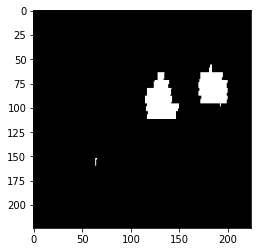

In [ ]:
ar2=np.expand_dims(a_r,axis=0)
br2=np.expand_dims(b_r,axis=0)
x,y,z=model.predict([ar2,br2])
x2=np.squeeze(x,axis=0)
plt.imshow(x2[:,:,1],cmap='gray')
x3 = np.argmax(x2, axis=2)
#plt.imshow(x3,cmap='gray')

In [ ]:
import cv2
#BARS GENERATED for CHECKING
a=skimage.io.imread('/content/drive/My Drive/REFERENCE_submission.jpg')
#a=cv2.cvtColor(a,cv2.COLOR_BGRA2RGB)
a2=cv2.resize(a,(224,224))
a_r=image.img_to_array(a2)
#a_r = a_r/255
#a_r=preprocess_input(a_r)
print(a_r.max(),a_r.min())


#ar=a_r/255
b=skimage.io.imread('/content/drive/My Drive/REFERENCE_generic.jpg')
#b=cv2.cvtColor(b,cv2.COLOR_BGRA2RGB)
b2=cv2.resize(b,(224,224))
b_r=image.img_to_array(b2)
b_r.shape
#b_r=preprocess_input(b_r)
#b_r = b_r/255
print(b_r.max(),b_r.min())

#br=b_r/255
#mask=skimage.io.imread('/home/sumit/Downloads/spot-the-diff-master/data/resized_images/mask_thresh/39_mask_thresh.jpg')

255.0 0.0
255.0 0.0


255 0
(192, 192, 3)
255 0


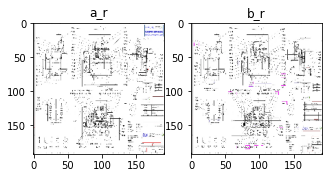

In [ ]:
#TEST REPLACED PARTS
#DIFFERENT
a_r = cv2.imread('/content/drive/My Drive/REFERENCE_generic.jpg')
#a=cv2.cvtColor(a,cv2.COLOR_BGRA2BGR)
a_r=cv2.resize(a_r,(192,192))
#a2 = skimage.transform.rotate(a2,10)
#plt.imshow(a2)
#a_r=image.img_to_array(a2)
#a_r = a_r/255
#a_r=preprocess_input(a_r)
print(a_r.max(),a_r.min())


#ar=a_r/255
b_r = cv2.imread('/content/drive/My Drive/REFERENCE_submission.jpg')
#b=cv2.cvtColor(b,cv2.COLOR_BGRA2BGR)
b_r=cv2.resize(b_r,(192,192))
print(b_r.shape)
#b_r=image.img_to_array(b2)
#b_r=preprocess_input(b_r)
#b_r = b_r/255
print(b_r.max(),b_r.min())
#plt.imshow(b2)
fig = plt.figure(figsize = (8,8))
img1 = fig.add_subplot(1,3,1)
img1.set_title('a_r')
plt.imshow(a_r,cmap='gray')

img2 = fig.add_subplot(1,3,2)
img2.set_title('b_r')
plt.imshow(b_r,cmap='gray')

#mask = cv2.imread('/content/drive/My Drive/Diff_Net_Parking_Data/Masks_Erode_Dilate_Thresh4/7_mask_thresh.jpg.png')
#img3 = fig.add_subplot(1,3,3)
#img3.set_title('Mask')
#plt.imshow(mask)

#br=b_r/255
#mask=skimage.io.imread('/home/sumit/Downloads/spot-the-diff-master/data/resized_images/mask_thresh/39_mask_thresh.jpg')

In [ ]:
ar2=np.expand_dims(a_r,axis=0)
br2=np.expand_dims(b_r,axis=0)
x=model.predict([ar2,br2])
x2=np.squeeze(x,axis=0)
plt.imshow(x2[:,:,1],cmap='gray')
x3 = np.argmax(x2, axis=2)
#plt.imshow(x3,cmap='gray')

ValueError: ignored